In [60]:
import numpy as np
import pandas as pd

# Importing data

In [61]:
ls


insurance.csv  insurance.ipynb  README.md  requierments.txt


In [62]:
insurance = pd.read_csv('insurance.csv', sep=';')
insurance.head()

/tmp/ipykernel_21551/1101451641.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  insurance = pd.read_csv('insurance.csv', sep=';')


,ID,Date_start_contract,Date_last_renewal,Date_next_renewal,Date_birth,Date_driving_licence,Distribution_channel,Seniority,Policies_in_force,Max_policies,...,Area,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight
0,1,05/11/2015,05/11/2015,05/11/2016,15/04/1956,20/03/1976,0,4,1,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
1,1,05/11/2015,05/11/2016,05/11/2017,15/04/1956,20/03/1976,0,4,1,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
2,1,05/11/2015,05/11/2017,05/11/2018,15/04/1956,20/03/1976,0,4,2,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
3,1,05/11/2015,05/11/2018,05/11/2019,15/04/1956,20/03/1976,0,4,2,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
4,2,26/09/2017,26/09/2017,26/09/2018,15/04/1956,20/03/1976,0,4,2,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190


# Data preparation

In [63]:
insurance.columns

Index(['ID', 'Date_start_contract', 'Date_last_renewal', 'Date_next_renewal',
       'Date_birth', 'Date_driving_licence', 'Distribution_channel',
       'Seniority', 'Policies_in_force', 'Max_policies', 'Max_products',
       'Lapse', 'Date_lapse', 'Payment', 'Premium', 'Cost_claims_year',
       'N_claims_year', 'N_claims_history', 'R_Claims_history', 'Type_risk',
       'Area', 'Second_driver', 'Year_matriculation', 'Power',
       'Cylinder_capacity', 'Value_vehicle', 'N_doors', 'Type_fuel', 'Length',
       'Weight'],
      dtype='object')

In [64]:
columns_to_drops = ['ID', 'Date_start_contract', 'Date_last_renewal', 'Date_next_renewal', 'Date_birth', 'Date_driving_licence','Distribution_channel', 'Policies_in_force','Max_policies', 'Max_products','Date_lapse', 'Lapse', 'Payment', 'Premium', 'Cost_claims_year',
       'N_claims_year', 'N_claims_history', 'R_Claims_history', 'Area', 'Second_driver', 'Year_matriculation', 'Length'   ]

In [65]:
insurance = insurance.drop(columns= columns_to_drops, axis=1)

In [66]:
insurance.head()

,Seniority,Type_risk,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Weight
0,4,1,80,599,7068.0,0,P,190
1,4,1,80,599,7068.0,0,P,190
2,4,1,80,599,7068.0,0,P,190
3,4,1,80,599,7068.0,0,P,190
4,4,1,80,599,7068.0,0,P,190


# Data Information

In [67]:
insurance.shape

(105555, 8)

In [68]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105555 entries, 0 to 105554
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Seniority          105555 non-null  int64  
 1   Type_risk          105555 non-null  int64  
 2   Power              105555 non-null  int64  
 3   Cylinder_capacity  105555 non-null  int64  
 4   Value_vehicle      105555 non-null  float64
 5   N_doors            105555 non-null  int64  
 6   Type_fuel          103791 non-null  object 
 7   Weight             105555 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 6.4+ MB


In [69]:
insurance.isnull().sum()

Seniority               0
Type_risk               0
Power                   0
Cylinder_capacity       0
Value_vehicle           0
N_doors                 0
Type_fuel            1764
Weight                  0
dtype: int64

In [70]:
insurance.duplicated().sum()

64933

In [71]:
insurance.describe()

,Seniority,Type_risk,Power,Cylinder_capacity,Value_vehicle,N_doors,Weight
count,105555.000000,105555.000000,105555.000000,105555.000000,105555.000000,105555.000000,105555.000000
mean,6.696604,2.721804,92.682611,1617.759367,18413.657243,4.067898,1191.262422
std,6.263911,0.614835,37.012645,604.697382,9135.074235,1.511839,458.081834
min,1.000000,1.000000,0.000000,49.000000,270.460000,0.000000,43.000000
25%,3.000000,3.000000,75.000000,1390.000000,13127.210000,3.000000,1043.000000
50%,4.000000,3.000000,90.000000,1598.000000,17608.770000,5.000000,1205.000000
75%,9.000000,3.000000,110.000000,1910.000000,22595.000000,5.000000,1388.000000
max,40.000000,4.000000,580.000000,7480.000000,220675.800000,6.000000,7300.000000


# Data Preprocessing

## drop duplicated data

In [72]:
insurance.drop_duplicates(inplace=True)

In [73]:
insurance.shape

(40622, 8)

In [74]:
insurance.duplicated().sum()

0

## drop if exist  null data

In [75]:
insurance = insurance.dropna()

In [76]:
insurance.shape

(39806, 8)

In [77]:
insurance.isnull().sum()

Seniority            0
Type_risk            0
Power                0
Cylinder_capacity    0
Value_vehicle        0
N_doors              0
Type_fuel            0
Weight               0
dtype: int64

In [78]:
insurance.shape

(39806, 8)

# Encoding

In [79]:
insurance_type = {
    'P':1,
    'D':2
}


In [80]:
insurance['Type_fuel'] = insurance['Type_fuel'].map(insurance_type)

In [81]:
insurance.head()

,Seniority,Type_risk,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Weight
0,4,1,80,599,7068.00,0,1,190
6,15,3,85,1229,16030.00,5,1,1105
10,3,1,6,74,1261.82,0,1,87
13,3,1,6,244,3000.00,0,1,92
15,13,3,87,1598,9927.00,4,1,1055


# Processing unbalanced Date

In [99]:
insurance['Type_risk'].value_counts()

Type_risk
3    31581
2     5410
1     2582
4      233
Name: count, dtype: int64

1

# Exploring DATA

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
# X = insurance['Type_risk']
# Y = insurance['Power']
# plt.scatter(X,Y,marker=',',color = 'red')

<Axes: >

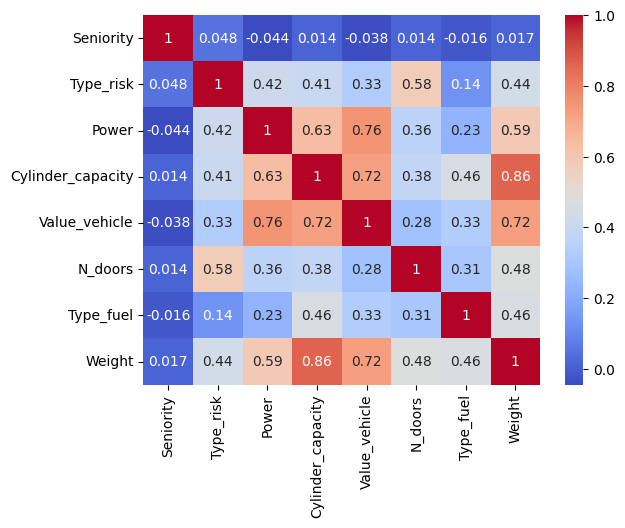

In [88]:
corr_feature = insurance.corr()
sns.heatmap(corr_feature,annot=True,cbar=True, cmap='coolwarm')

/tmp/ipykernel_21551/189941368.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['Value_vehicle'])


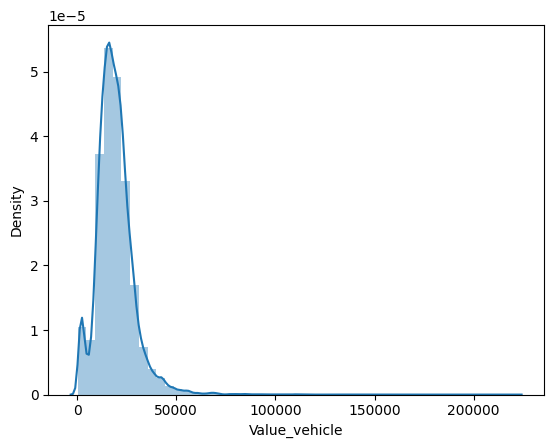

In [89]:
sns.distplot(insurance['Value_vehicle'])
plt.show()

/tmp/ipykernel_21551/1496202371.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['Power'])


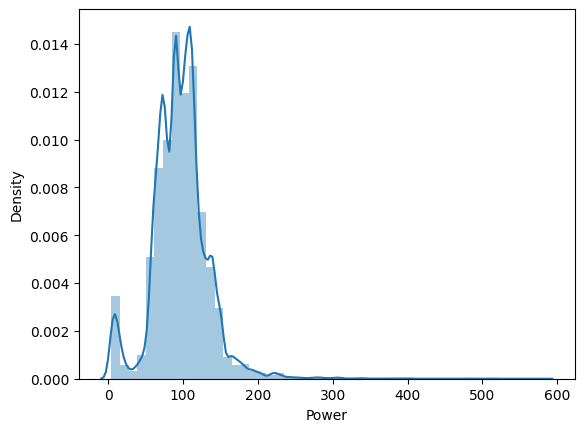

In [90]:
sns.distplot(insurance['Power'])
plt.show()

/tmp/ipykernel_21551/3666333232.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['Seniority'])


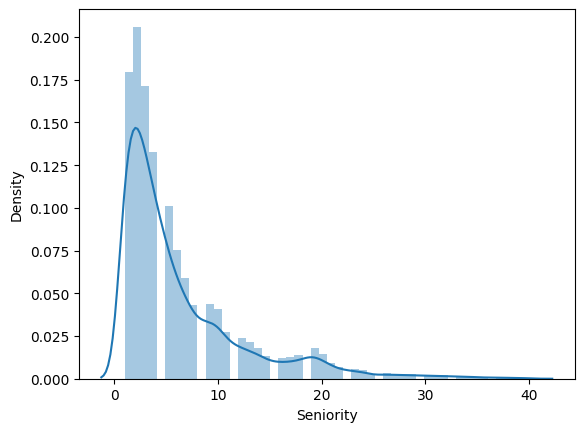

In [91]:
sns.distplot(insurance['Seniority'])
plt.show()